In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [39]:
digits = load_digits()
X, y = digits.data, digits.target

In [40]:
print(f"Forma dei dati: {X.shape}")  # Output: (n_samples, 64)
print(f"Etichette: {np.unique(y)}")
#descrizione digits 
print(digits.DESCR)

Forma dei dati: (1797, 64)
Etichette: [0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number 

In [41]:
df = pd.DataFrame(X, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Applica PCA per ridurre a 2 dimensioni

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizza i dati nel nuovo spazio bidimensionale

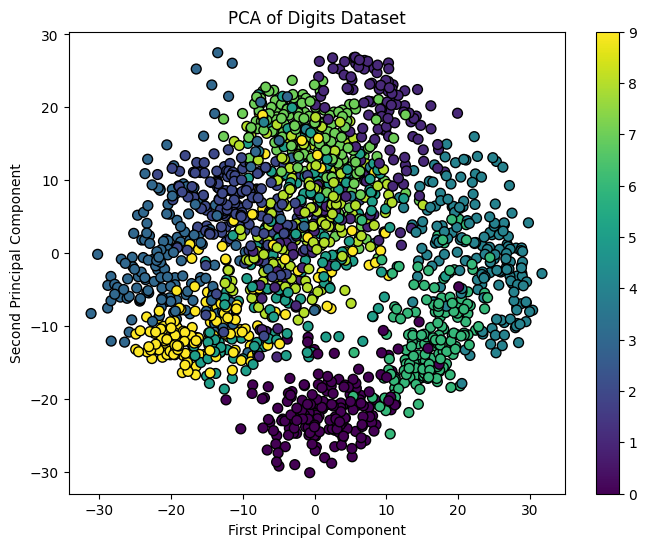

In [43]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Digits Dataset')
plt.show()

##  Suddividi i dati in training e test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [45]:
# 6. Addestra un modello di classificazione sui dati originali
model_original = LogisticRegression(max_iter=10000, random_state=42)
model_original.fit(X_train, y_train)

y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuratezza sui dati originali: {accuracy_original:.2f}")

Accuratezza sui dati originali: 0.97


In [46]:
model_pca = LogisticRegression(max_iter=10000, random_state=42)
model_pca.fit(X_pca_train, y_train_pca)

y_pred_pca = model_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuratezza sui dati ridotti con PCA: {accuracy_pca:.2f}")

Accuratezza sui dati ridotti con PCA: 0.65


#  Analisi dell'impatto della riduzione dimensionalità

In [47]:
print("\nAnalisi dell'impatto:")
print(f"- Accuratezza con dati originali: {accuracy_original:.2f}")
print(f"- Accuratezza con PCA: {accuracy_pca:.2f}")
print("La riduzione della dimensionalità con PCA a sole 2 componenti principali causa una perdita significativa di informazione, influendo negativamente sull'accuratezza del modello di classificazione.")



Analisi dell'impatto:
- Accuratezza con dati originali: 0.97
- Accuratezza con PCA: 0.65
La riduzione della dimensionalità con PCA a sole 2 componenti principali causa una perdita significativa di informazione, influendo negativamente sull'accuratezza del modello di classificazione.


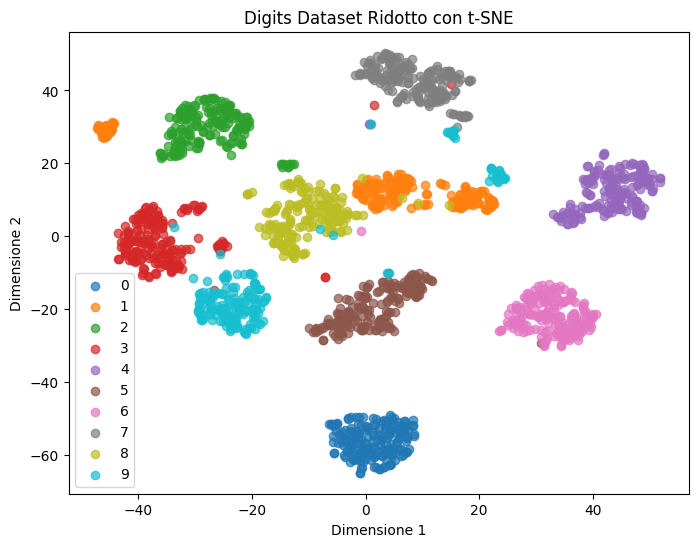

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in np.unique(y):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i), alpha=0.7)
plt.xlabel('Dimensione 1')
plt.ylabel('Dimensione 2')
plt.title('Digits Dataset Ridotto con t-SNE')
plt.legend()
plt.show()



In [49]:
X_ts_train, X_ts_test, y_ts_pca, y_ts_pca = train_test_split(X_tsne, y, test_size=0.2, random_state=42)


In [ ]:
model_ts = LogisticRegression(max_iter=10000, random_state=42)
model_ts.fit(X_ts_train, y_train)

y_pred_pca = model_pca.predict(X_ts_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuratezza sui dati ridotti con PCA: {accuracy_pca:.2f}")